# HITS Algorithm

This is a `Hyperlink Induced Topic Search` Algorithm.
<br>
We will solve two questions in this notebook, using both the `networkx` library, and also using our own custom implementation.

[Reference Link](https://www.geeksforgeeks.org/hyperlink-induced-topic-search-hits-algorithm-using-networxx-module-python/)

In [1]:
# For finding square root, and other mathematical calculation
import math

# For the library based networkx implementation of the HITS algorithm
import networkx as nx

# Import the Pyplot library for plotting the created graph
from matplotlib import pyplot as plt

In [2]:
# Number of Maximum Iterations specfied

num_iterations = 50

## Question - 1

Compute the Hubs and authority weights for the following graph.

![image.png](./image.png)

### 1.1 Custom Implementation

In [3]:
# Names of the vertices
vertices_names_1 = ['1', '2', '3', '4']

# Number of vertices
num_vertices_1 = 4

In [4]:
# We will first form a adjacency matrix denoting the relationships shown in the image above.

adjacency_matrix_1 = [
    [0, 1, 1, 0],
    [0, 0, 0, 0],
    [0, 1, 0, 1],
    [1, 0, 0, 0]
]

In [5]:
# Convert the adjacency matrix into any other form for the easy access of the data.

# Store the out-bound vertices for each vertex
outbound_vertices_1 = [[] for _ in range(num_vertices_1)]

for i in range(num_vertices_1) :
    for j in range(num_vertices_1) :
        if adjacency_matrix_1[i][j] == 1 :
            outbound_vertices_1[i].append(j)

outbound_vertices_1

[[1, 2], [], [1, 3], [0]]

In [6]:
# Store the in-bound vertices for each vertex
inbound_vertices_1 = [[] for _ in range(num_vertices_1)]

for i in range(num_vertices_1) :
    for j in range(num_vertices_1) :
        if adjacency_matrix_1[j][i] == 1 :
            inbound_vertices_1[i].append(j)

inbound_vertices_1

[[3], [0, 2], [0], [2]]

In [43]:
# We will initialize the `authority` and the `hub` scores.

authority_scores_1 = [1] * num_vertices_1
hub_scores_1 = [1] * num_vertices_1

In [44]:
# Implement the algorithm for the specfied number of iterations 

for itr in range(num_iterations) :
    
    # Copy the current authority, and hub scores
    old_authority_scores = authority_scores_1[:]
    old_hub_scores = hub_scores_1[:]
    
    # Update the authority and hub scores
    for i in range(num_vertices_1) :
        authority_scores_1[i] = sum([old_hub_scores[j] for j in inbound_vertices_1[i]])
        hub_scores_1[i] = sum([old_authority_scores[j] for j in outbound_vertices_1[i]])
    
    # Normalize the values
    a_normal = math.sqrt(sum([i**2 for i in authority_scores_1]))
    h_normal = math.sqrt(sum([i**2 for i in hub_scores_1]))
    for i in range(num_vertices_1) :
        authority_scores_1[i] = authority_scores_1[i] / a_normal
        hub_scores_1[i] = hub_scores_1[i] / h_normal

In [45]:
# Print the Authority scores

print(f"The Authority scores of the nodes after {num_iterations} iterations : ")
for i in range(num_vertices_1) :
    print(vertices_names_1[i], " : ", authority_scores_1[i])

The Authority scores of the nodes after 50 iterations : 
1  :  7.227436187279358e-13
2  :  0.816496580927726
3  :  0.408248290463863
4  :  0.408248290463863


In [46]:
# Print the Hub scores

print(f"The Hub scores of the nodes after {num_iterations} iterations : ")
for i in range(num_vertices_1) :
    print(vertices_names_1[i], " : ", hub_scores_1[i])

The Hub scores of the nodes after 50 iterations : 
1  :  0.7071067811865476
2  :  0.0
3  :  0.7071067811865476
4  :  8.34552445655316e-13


### 1.2 Networkx Implementation

In [16]:
# Create an instance of the Graph class
# We are using a Directed graph due to the nature of our problem.

graph_1 = nx.DiGraph()

In [18]:
# Load the nodes into the graph

graph_1.add_nodes_from(vertices_names_1)

In [19]:
# Add the edges from the adjacency matrix

for i in range(num_vertices_1) :
    for j in range(num_vertices_1) :
        if adjacency_matrix_1[i][j] == 1 :
            graph_1.add_edge(vertices_names_1[i], vertices_names_1[j])

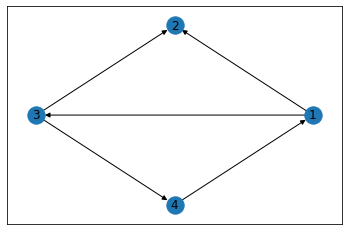

In [20]:
# Draw generated graph

nx.draw_networkx(graph_1, pos=nx.circular_layout(graph_1), arrows=True, with_labels=True)
plt.show()

In [23]:
# Compute the scores

hub_scores_networkx_1, authority_scores_networkx_1 = nx.hits(graph_1, normalized = True)

In [49]:
# Print the Authority scores

print("The Authority scores of the nodes using Networkx library : ")
for k, v in authority_scores_networkx_1.items() :
    print(k, " : ", v)

The Authority scores of the nodes using Networkx library : 
1  :  1.93588109003726e-09
2  :  0.4999999990320594
3  :  0.2499999995160297
4  :  0.2499999995160297


In [50]:
# Print the Hub scores

print("The Hub scores of the nodes using Networkx library : ")
for k, v in hub_scores_networkx_1.items() :
    print(k, " : ", v)

The Hub scores of the nodes using Networkx library : 
1  :  0.4999999993547063
2  :  0.0
3  :  0.4999999993547063
4  :  1.2905873941909817e-09


### 1.3 Result
We can notice that both these methods give the authority and hub scores of the pages in the same order.

## Question - 2

Assume a small universe of four web pages: `A, B, C, D`. Links from a page to itself, or multiple outbound links from one single page to another single page, are ignored. 
<br>
The following is the configaration of the nodes :
* Page B had a link to pages C and A
* Page C had a link to page A
* Page D had links to all three pages


Compute the `Authority` and `Hub` scores of the given web pages.

### 2.1 Custom Implementation

In [3]:
# Names of the vertices
vertices_names_2 = ['A', 'B', 'C', 'D']

# Number of vertices
num_vertices_2 = 4

In [4]:
# We will first form a adjacency matrix denoting the relationships shown in the image above.

adjacency_matrix_2 = [
    [0, 0, 0, 0],
    [1, 0, 1, 0],
    [1, 0, 0, 0],
    [1, 1, 1, 0]
]

In [5]:
# Convert the adjacency matrix into any other form for the easy access of the data.

# Store the out-bound vertices for each vertex
outbound_vertices_2 = [[] for _ in range(num_vertices_2)]

for i in range(num_vertices_2) :
    for j in range(num_vertices_2) :
        if adjacency_matrix_2[i][j] == 1 :
            outbound_vertices_2[i].append(j)

outbound_vertices_2

[[], [0, 2], [0], [0, 1, 2]]

In [6]:
# Store the in-bound vertices for each vertex
inbound_vertices_2 = [[] for _ in range(num_vertices_2)]

for i in range(num_vertices_2) :
    for j in range(num_vertices_2) :
        if adjacency_matrix_2[j][i] == 1 :
            inbound_vertices_2[i].append(j)

inbound_vertices_2

[[1, 2, 3], [3], [1, 3], []]

In [7]:
# We will initialize the `authority` and the `hub` scores.

authority_scores_2 = [1] * num_vertices_2
hub_scores_2 = [1] * num_vertices_2

In [8]:
# Implement the algorithm for the specfied number of iterations 

for itr in range(num_iterations) :
    
    # Copy the current authority, and hub scores
    old_authority_scores = authority_scores_2[:]
    old_hub_scores = hub_scores_2[:]
    
    # Update the authority and hub scores
    for i in range(num_vertices_2) :
        authority_scores_2[i] = sum([old_hub_scores[j] for j in inbound_vertices_2[i]])
        hub_scores_2[i] = sum([old_authority_scores[j] for j in outbound_vertices_2[i]])
    
    # Normalize the values
    a_normal = math.sqrt(sum([i**2 for i in authority_scores_2]))
    h_normal = math.sqrt(sum([i**2 for i in hub_scores_2]))
    for i in range(num_vertices_2) :
        authority_scores_2[i] = authority_scores_2[i] / a_normal
        hub_scores_2[i] = hub_scores_2[i] / h_normal

In [9]:
# Print the Authority scores

print(f"The Authority scores of the nodes after {num_iterations} iterations : ")
for i in range(num_vertices_2) :
    print(vertices_names_2[i], " : ", authority_scores_2[i])

The Authority scores of the nodes after 50 iterations : 
A  :  0.7369762290995783
B  :  0.3279852776056818
C  :  0.5910090485061036
D  :  0.0


In [10]:
# Print the Hub scores

print(f"The Hub scores of the nodes after {num_iterations} iterations : ")
for i in range(num_vertices_2) :
    print(vertices_names_2[i], " : ", hub_scores_2[i])

The Hub scores of the nodes after 50 iterations : 
A  :  0.0
B  :  0.5910090485061036
C  :  0.32798527760568175
D  :  0.7369762290995782


### 2.2 Networkx Implementation

In [11]:
# Create an instance of the Graph class
# We are using a Directed graph due to the nature of our problem.

graph_2 = nx.DiGraph()

In [12]:
# Load the nodes into the graph

graph_2.add_nodes_from(vertices_names_2)

In [13]:
# Add the edges from the adjacency matrix

for i in range(num_vertices_2) :
    for j in range(num_vertices_2) :
        if adjacency_matrix_2[i][j] == 1 :
            graph_2.add_edge(vertices_names_2[i], vertices_names_2[j])

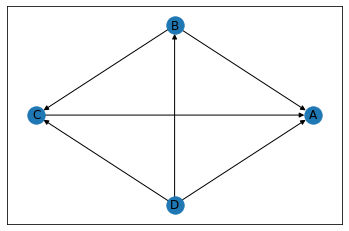

In [14]:
# Draw generated graph

nx.draw_networkx(graph_2, pos=nx.circular_layout(graph_2), arrows=True, with_labels=True)
plt.show()

In [15]:
# Compute the scores

hub_scores_networkx_2, authority_scores_networkx_2 = nx.hits(graph_2, normalized = True)

In [16]:
# Print the Authority scores

print("The Authority scores of the nodes using Networkx library : ")
for k, v in authority_scores_networkx_2.items() :
    print(k, " : ", v)

The Authority scores of the nodes using Networkx library : 
A  :  0.44504186834925136
B  :  0.198062263845162
C  :  0.35689586780558674
D  :  0.0


In [17]:
# Print the Hub scores

print("The Hub scores of the nodes using Networkx library : ")
for k, v in hub_scores_networkx_2.items() :
    print(k, " : ", v)

The Hub scores of the nodes using Networkx library : 
A  :  0.0
B  :  0.35689586792303196
C  :  0.1980622643201395
D  :  0.4450418677568287


### 2.3 Result
We can notice that both these methods give the authority and hub scores of the pages in the same order.